In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import random
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

'''Creat a classification dataset'''
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=42)
print(X_train[0:2500])


[[-1.68309226 -0.80640659]
 [ 1.05695986 -2.10802305]
 [-0.36797392 -0.43371372]
 ...
 [-0.35067208 -0.52161334]
 [ 0.7987196   0.15415915]
 [-1.02179729 -0.92346428]]


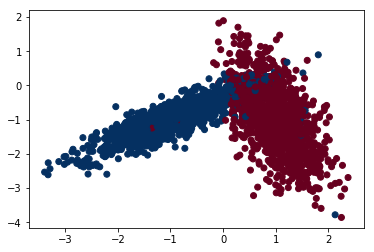

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
'''Implementing Scatter plot using test data'''
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap='RdBu')
plt.show()

In [21]:


def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    Param=sorted(random.sample(range(1,50),10))
    '''Calculating 10 random number at the range of param_range which will be the value of k'''
    trainscores=[]
    cvscores=[]
    D=dict()
    s=0
    
    for i in range(1,fold+1):
        id=(len(x_train)*i//fold)
        D[i]=list(range(s,id))
        s=id
        '''Depending on fold value,dividing the train data based on indices and store it in a dict'''
    for k in tqdm(Param):
        knn = KNeighborsClassifier(n_neighbors=k)
        trainacc=[]
        cvacc=[]
        for i in range(1,fold+1):
            '''Creat train value and cross validation for each fold value'''
            cv_indices=D[i]
            train_indices=list(set(list(range(1, len(x_train)))) - set(cv_indices))
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_cv  = x_train[cv_indices]
            Y_cv  = y_train[cv_indices]
            '''knn classifier fit on train data'''
            knn.fit(X_train,Y_train)
            cv_predict = knn.predict(X_cv)
            '''Predicting Yq value for each Xq in X-cv'''
            cv_acc = accuracy_score(Y_cv,  cv_predict) 
            '''Measure the accuracy'''
            cvacc.append(cv_acc)
            train_predict = knn.predict(X_train)
            '''Predicting Yq value for each Xq in X-train'''
            train_acc = accuracy_score(Y_train,  train_predict)
            '''Measure the accuracy'''
            trainacc.append(train_acc)

        trainscores.append(np.mean(np.array(trainacc)))
        '''store the mean value of accuracy for each k value'''
        cvscores.append(np.mean(np.array(cvacc)))
    return trainscores,cvscores, Param

param_range=int(input())
fold=int(input())
classifier=KNeighborsClassifier()
        
trainscores,testscores, Param =RandomSearchCV(X_train,y_train,classifier, param_range, fold)
print('trainscores\n',trainscores)
print('-----------------------------------------------------------')
print('testscores\n',testscores)
print('-----------------------------------------------------------')
print('parameter as ke value\n',Param)

50
3


100%|██████████████████████████████████████████| 10/10 [00:04<00:00,  2.08it/s]

trainscores
 [0.9639284923651396, 0.9627283590051343, 0.9607281456291258, 0.9596613589384543, 0.958994598919784, 0.9593279855971194, 0.9595946789357872, 0.9593279589251184, 0.9595279589251184, 0.9599947056077882]
-----------------------------------------------------------
testscores
 [0.9548, 0.9556, 0.9570666666666666, 0.9586666666666667, 0.9586666666666668, 0.9588000000000001, 0.9585333333333333, 0.9586666666666668, 0.9588000000000001, 0.9590666666666667]
-----------------------------------------------------------
parameter as ke value
 [5, 6, 12, 27, 33, 38, 40, 41, 46, 49]


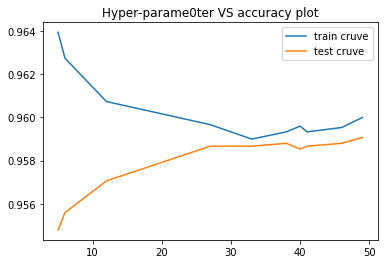

In [22]:

plt.plot(Param,trainscores, label='train cruve')
plt.plot(Param,testscores, label='test cruve')
plt.title('Hyper-parame0ter VS accuracy plot')
plt.legend()
plt.show()

Observation:
   1. from the above curve we an conclude k value near to 30 will give good accuracy.
   2. Because of taking random value of k, this graph is changing for each iteration

In [23]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()


The accuracy of the knn classifier for k = 30 is 96.280000%


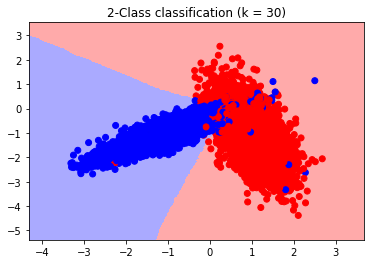

In [25]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 30)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 30 is %f%%' % ( acc))
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)